# Árvores de Decisão e Bayesiano Gaussiano

Scikit-learn: 

Decision Tree:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Gaussian Naive Bayes:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Árvores de Decisão

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_10 <= 1.05
|   |   |   |--- class: 1
|   |   |--- feature_10 >  1.05
|   |   |   |--- class: 0
|   |--- feature_27 >  0.14
|   |   |--- feature_21 <= 25.67
|   |   |   |--- class: 1
|   |   |--- feature_21 >  25.67
|   |   |   |--- class: 0
|--- feature_20 >  16.80
|   |--- feature_21 <= 19.91
|   |   |--- feature_16 <= 0.03
|   |   |   |--- class: 1
|   |   |--- feature_16 >  0.03
|   |   |   |--- class: 0
|   |--- feature_21 >  19.91
|   |   |--- feature_24 <= 0.09
|   |   |   |--- class: 1
|   |   |--- feature_24 >  0.09
|   |   |   |--- class: 0



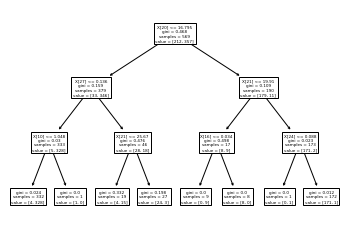

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

breast = datasets.load_breast_cancer()
breast_X = breast.data
breast_y = breast.target

dt = DecisionTreeClassifier(max_depth=3)

dtree = dt.fit(breast_X, breast_y)

plot_tree(dtree)

r = export_text(dtree)

print(r)




Substituindo o default indice gini por ganho de informação como criterio de qualidade para escolha da característica

|--- feature_22 <= 105.95
|   |--- feature_27 <= 0.14
|   |   |--- feature_13 <= 48.98
|   |   |   |--- class: 1
|   |   |--- feature_13 >  48.98
|   |   |   |--- class: 0
|   |--- feature_27 >  0.14
|   |   |--- feature_21 <= 27.58
|   |   |   |--- class: 1
|   |   |--- feature_21 >  27.58
|   |   |   |--- class: 0
|--- feature_22 >  105.95
|   |--- feature_22 <= 117.45
|   |   |--- feature_24 <= 0.14
|   |   |   |--- class: 1
|   |   |--- feature_24 >  0.14
|   |   |   |--- class: 0
|   |--- feature_22 >  117.45
|   |   |--- feature_27 <= 0.09
|   |   |   |--- class: 1
|   |   |--- feature_27 >  0.09
|   |   |   |--- class: 0



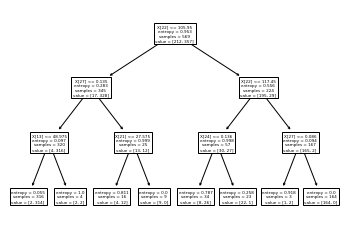

In [2]:
dt = DecisionTreeClassifier(max_depth=3, criterion="entropy")

dtree = dt.fit(breast_X, breast_y)

plot_tree(dtree)

r = export_text(dtree)

print(r)

Com poda

|--- feature_20 <= 16.80
|   |--- class: 1
|--- feature_20 >  16.80
|   |--- class: 0



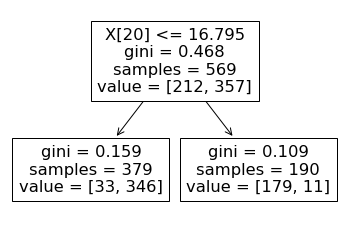

In [3]:
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.1)

dtree = dt.fit(breast_X, breast_y)

plot_tree(dtree)

r = export_text(dtree)

print(r)

In [4]:
from scipy import stats
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold

dt = DecisionTreeClassifier()

grade={'max_depth': [3,5,10]}

gs = GridSearchCV(estimator=dt, param_grid = grade, 
                  scoring='accuracy', cv = 4)

rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=6)

scores = cross_val_score(gs, breast_X, breast_y, scoring='accuracy', 
                         cv = rkf)

print(scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup)) 

[0.93859649 0.89473684 0.96491228 0.9122807  0.90265487 0.92982456
 0.9122807  0.92105263 0.92105263 0.91150442 0.93859649 0.92982456
 0.9122807  0.89473684 0.9380531  0.90350877 0.93859649 0.93859649
 0.92982456 0.92920354 0.94736842 0.92982456 0.9122807  0.9122807
 0.94690265 0.9122807  0.93859649 0.94736842 0.95614035 0.9380531 ]

Mean Accuracy: 0.93 Standard Deviation: 0.02
Accuracy Confidence Interval (95%): (0.92, 0.93)



Naive Bayes Gaussiano

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

gNB = GaussianNB()

rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=6)

scores = cross_val_score(gNB, breast_X, breast_y, scoring='accuracy', 
                         cv = rkf)

print(scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup)) 

[0.95614035 0.94736842 0.95614035 0.92105263 0.92035398 0.95614035
 0.93859649 0.92105263 0.92982456 0.95575221 0.93859649 0.93859649
 0.92982456 0.94736842 0.95575221 0.93859649 0.92982456 0.96491228
 0.95614035 0.92035398 0.95614035 0.94736842 0.92105263 0.96491228
 0.91150442 0.92982456 0.94736842 0.92982456 0.93859649 0.95575221]

Mean Accuracy: 0.94 Standard Deviation: 0.01
Accuracy Confidence Interval (95%): (0.94, 0.95)



### Exercícios de Fixação

1. Explique porque o uso de da métrica do Ganho Máximo de Informação gera viés por árvores mais amplas. Apresente uma solução para reduzir esse viés. Compare a acurácia da árvore de decisão que utiliza ganho de informação com aquela que usa índice gini para seleção da característica dos nós de decisão da árvore no dataset wine. Faça a comparação usando 6 rodadas de validação cruzada estratificada com 5 folds. A menos do critério de seleção de caraterísticas, use os valores default para os demais hiperparâmetros da árvore. Indique se existe diferença significativa entre os resultados das árvores usando o teste t de Student.

In [7]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from scipy import stats
from scipy.stats import ttest_rel
import numpy as np

wine = datasets.load_wine()
data = wine.data
target = wine.target

decisionEntropyClassifier = DecisionTreeClassifier(criterion="entropy")
decisionGiniClassifier =  DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=6)
scores = cross_val_score(decisionEntropyClassifier, data, target, scoring='accuracy', cv=cv)

mean = scores.mean()
std = scores.std()
lower, upper = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(scores)))

print("Entropy: \n")
print("Mean: ", mean)
print("Std: ", std)
print("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (lower, upper))

scoresGini = cross_val_score(decisionGiniClassifier, data, target, scoring='accuracy', cv=cv)

mean = scoresGini.mean()
std = scoresGini.std()
lower, upper = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(scoresGini)))

print("Gini: \n")
print("Mean: ", mean)
print("Std: ", std)
print("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (lower, upper))

s,p = ttest_rel(scores,scoresGini)
print("T: %0.2f P-Value: %0.2f\n" % (s,p))


Entropy: 

Mean:  0.9215608465608465
Std:  0.04666508443729806
Accuracy Confidence Interval (95%): (0.90, 0.94)

Gini: 

Mean:  0.9083862433862434
Std:  0.04654371528276102
Accuracy Confidence Interval (95%): (0.89, 0.93)

t: 1.36 p-value: 0.18



2. Qual o objetivo de se realizar poda nas árvores de decisão? Determine qual o valor do hiperparâmetro ccp_alpha (fator de poda) em uma busca em grade com validação cruzada em 10 folds no dataset wine que obtém a melhor acurácia média. Varie o hiperparâmetro de 0.1 em 0.1 no intervalo entre 0.1 e 0.7.

A poda é importante para generalizar a árvore, evitando o overfitting das regras.

3. Explique o que é a pressuposição de independência utilizada no classificador Naive Bayes e porque ela é adotada neste classificador? Qual a possível consequência negativa de sua adoção? Apresente uma alternativa para não adotar a pressuposição e qual a dificuldade em adotá-la? Compare o desempenho em f1 macro do classificador Naive Bayes com os do classificadores Árvore de Decisão (com valores default de hiperparâmetros) e com o classificador aleatório estratificado em uma validação cruzada com 10 folds no dataset breast. 

4. O artigo "Submersible Motor Pump Fault Diagnosis System: A Comparative Study of Classification Methods" realiza uma comparação experimental de vários classificadores em um problema de detecção de falha. Compare o desempenho alcançado pela árvore de decisão com dados padronizados e não padronizados. Qual a inferência feita no artigo sobre essa comparação?